# Combining

In [100]:
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn import preprocessing

# Data Cleaning

In [101]:
# opel_corsa_01 = pd.read_csv("data/opel_corsa_01.csv", sep = ';')
# opel_corsa_01["Car"] = "opel"
# opel_corsa_01["Journey"] = 1


# opel_corsa_02 = pd.read_csv("data/opel_corsa_02.csv", sep = ';')
# opel_corsa_02["Car"] = "opel"
# opel_corsa_02["Journey"] = 2

# peugeot_207_01 = pd.read_csv("data/peugeot_207_01.csv", sep = ';')
# peugeot_207_01["Car"] = "peugeot"
# peugeot_207_01["Journey"] = 3

# peugeot_207_02 = pd.read_csv("data/peugeot_207_01.csv", sep = ';')
# peugeot_207_02["Car"] = "peugeot"
# peugeot_207_02["Journey"] = 4

# dataset = [opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02]

# combined = pd.concat(dataset)
# combined= combined.reset_index()

# data_pre_cleaning = combined.drop('Unnamed: 0', axis = 1)

# data_pre_cleaning.to_csv("data/pre_cleaning_dataset.csv",index = False)

# Removing  Nulls

In [102]:
raw_data = pd.read_csv('pre_cleaning_dataset.csv')

In [103]:
#Putting the class driving Style in the last column
column_names = ["AltitudeVariation", "VehicleSpeedInstantaneous", "VehicleSpeedAverage",'VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage','roadSurface','traffic','Make','Source File','drivingStyle']
raw_data = raw_data.reindex(columns=column_names)

In [104]:
# Checking for null values
raw_data.isnull().sum()

AltitudeVariation             0
VehicleSpeedInstantaneous     6
VehicleSpeedAverage           0
VehicleSpeedVariance          0
VehicleSpeedVariation         0
LongitudinalAcceleration      0
EngineLoad                   10
EngineCoolantTemperature     10
ManifoldAbsolutePressure     10
EngineRPM                    10
MassAirFlow                  10
IntakeAirTemperature         10
VerticalAcceleration          0
FuelConsumptionAverage       10
roadSurface                   0
traffic                       0
Make                          0
Source File                   0
drivingStyle                  0
dtype: int64

In [105]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['EngineLoad']) 
raw_data = raw_data.dropna(subset = ['VehicleSpeedInstantaneous']) 

In [106]:
raw_data.isnull().sum()

AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
roadSurface                  0
traffic                      0
Make                         0
Source File                  0
drivingStyle                 0
dtype: int64

In [107]:
raw_data.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,Make,Source File,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,Opal Corsa,1,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,Opal Corsa,1,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,Opal Corsa,1,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,Opal Corsa,1,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,Opal Corsa,1,EvenPaceStyle


# Removing Outliers - using IQR

In [108]:
#https://www.youtube.com/watch?v=Vc4cXIAa69Y

In [109]:
raw_data = raw_data.drop(['Source File','Make','traffic','roadSurface'], axis = 1)

In [110]:
raw_data.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,EvenPaceStyle


In [111]:
raw_data.shape

(27514, 15)

In [112]:
raw_data.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
count,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000,27514.000000
mean,-0.293480,43.564485,43.776130,173.779733,-0.014187,0.946743,38.756299,71.450970,116.768918,1553.102929,17.068457,27.043578,0.231812,14.272438
std,2.184945,35.693410,33.055128,190.983263,2.442012,1.457649,28.329016,15.433343,20.460458,592.917996,9.810081,12.525937,3.268870,4.324874
min,-24.600006,0.000000,0.000000,0.000000,-18.000002,-2.380000,0.000000,12.000000,88.000000,0.000000,0.880000,7.000000,-2.763100,7.271883
25%,-1.500000,14.861880,18.089999,44.291667,-0.900002,0.097825,18.431374,67.000000,103.000000,941.500000,7.850000,17.000000,-0.782200,10.681453
50%,-0.199997,36.000000,33.544033,112.013157,0.000000,0.785000,31.372549,79.000000,108.000000,1557.000000,16.490000,22.000000,-0.247400,13.769692
75%,0.700012,63.899998,60.587492,232.725667,0.900002,1.450675,67.058823,80.000000,126.000000,2059.000000,23.830000,37.000000,0.164100,16.677682
max,10.700012,124.749725,121.330733,1418.370369,97.199997,8.477800,100.000000,89.000000,252.000000,3167.000000,73.250000,65.000000,17.944800,45.336861


# Standarising Data

In [113]:
std_scale = preprocessing.StandardScaler().fit(raw_data[['AltitudeVariation', 'VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage']])
df_std = std_scale.transform(raw_data[['AltitudeVariation', 'VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage']])

In [114]:
df_std.shape # numpy it should be DF

(27514, 14)

In [115]:
raw_data.shape

(27514, 15)

In [116]:
raw_data.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,EvenPaceStyle


#Adding drivingStyle column

In [117]:
df_std_data = pd.DataFrame(data=df_std, columns=['AltitudeVariation', 'VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage'])

In [118]:
#Adding Drivestyle column
ds_df = raw_data['drivingStyle'].to_frame()
ds_df= ds_df.reset_index(drop=True)
df_std_data['drivingStyle'] = ds_df['drivingStyle']

In [119]:
df_std_data

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,drivingStyle
0,-0.918350,-0.501333,-0.924310,-0.273260,-1.008528,-0.405621,-1.201984,-0.223609,-0.526338,0.409671,-0.128284,-0.242986,-0.105577,1.208126,EvenPaceStyle
1,-0.826807,-0.545495,-0.911742,-0.279386,-0.639678,-0.341338,-0.994336,-0.223609,-0.672965,0.229205,-0.246532,-0.402658,-0.110350,1.212378,EvenPaceStyle
2,-0.552207,-0.583348,-0.899879,-0.289680,-0.547465,-0.357392,-0.399079,-0.223609,-0.672965,0.077410,-0.531958,-0.482494,-0.111543,1.195277,EvenPaceStyle
3,0.180107,-0.595966,-0.895643,-0.294316,-0.178615,-0.365487,-0.509825,-0.158813,-0.624089,0.112829,-0.495261,-0.562330,-0.097195,1.183023,EvenPaceStyle
4,0.180079,-0.558113,-0.890867,-0.296919,0.559085,-0.378865,-0.662100,-0.158813,-0.624089,0.261250,-0.525842,-0.482494,-0.091230,1.162876,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27509,-0.094521,-1.220541,-0.534303,-0.234856,0.005810,0.857669,-0.302177,0.489147,-0.672965,-1.352830,-1.307705,0.236028,-0.555466,0.050949,EvenPaceStyle
27510,0.134322,-1.220541,-0.556085,-0.202996,0.005810,0.799903,-0.302177,0.489147,-0.672965,-1.351987,-1.301589,0.315864,-0.545340,0.050949,EvenPaceStyle
27511,0.088554,-1.220541,-0.576052,-0.165989,0.005810,0.766699,-0.274491,0.489147,-0.672965,-1.355360,-1.318918,0.315864,-0.536651,0.050949,EvenPaceStyle
27512,0.363164,-1.220541,-0.596019,-0.133621,0.005810,0.645817,-0.329863,0.489147,-0.672965,-1.351987,-1.307705,0.315864,-0.558494,0.050949,EvenPaceStyle


# Drivingstyle 1-0

In [120]:
df_std_data = df_std_data.replace('EvenPaceStyle', 1)
df_std_data = df_std_data.replace('AggressiveStyle', 0)

In [121]:
df_std_data.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,drivingStyle
0,-0.918350,-0.501333,-0.924310,-0.273260,-1.008528,-0.405621,-1.201984,-0.223609,-0.526338,0.409671,-0.128284,-0.242986,-0.105577,1.208126,1
1,-0.826807,-0.545495,-0.911742,-0.279386,-0.639678,-0.341338,-0.994336,-0.223609,-0.672965,0.229205,-0.246532,-0.402658,-0.110350,1.212378,1
2,-0.552207,-0.583348,-0.899879,-0.289680,-0.547465,-0.357392,-0.399079,-0.223609,-0.672965,0.077410,-0.531958,-0.482494,-0.111543,1.195277,1
3,0.180107,-0.595966,-0.895643,-0.294316,-0.178615,-0.365487,-0.509825,-0.158813,-0.624089,0.112829,-0.495261,-0.562330,-0.097195,1.183023,1
4,0.180079,-0.558113,-0.890867,-0.296919,0.559085,-0.378865,-0.662100,-0.158813,-0.624089,0.261250,-0.525842,-0.482494,-0.091230,1.162876,1


# Feature Selection - Decision Tree

In [122]:
# Split the data into X & y

X = df_std_data.drop('drivingStyle', axis = 1).values # . values to create a vector/ array
y = df_std_data['drivingStyle']

y = y.astype(int)

print(X.shape)
print(y.shape)

(27514, 14)
(27514,)


In [123]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [124]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(df_std_data.drop('drivingStyle', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
    
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:20]

fi_df

The feature importance for AltitudeVariation is : 0.026910892899330106
The feature importance for VehicleSpeedInstantaneous is : 0.23998635538184004
The feature importance for VehicleSpeedAverage is : 0.1612105259540845
The feature importance for VehicleSpeedVariance is : 0.09598809597551065
The feature importance for VehicleSpeedVariation is : 0.005543068773092692
The feature importance for LongitudinalAcceleration is : 0.08056070022285504
The feature importance for EngineLoad is : 0.007294786402465495
The feature importance for EngineCoolantTemperature is : 0.05058856181687419
The feature importance for ManifoldAbsolutePressure is : 0.016424054896645945
The feature importance for EngineRPM is : 0.038415227158653246
The feature importance for MassAirFlow is : 0.0110149816236743
The feature importance for IntakeAirTemperature is : 0.10967632954382593
The feature importance for VerticalAcceleration is : 0.05493790048568463
The feature importance for FuelConsumptionAverage is : 0.1014485

,index,Feature,Feature Importance
0,1,VehicleSpeedInstantaneous,0.239986
1,2,VehicleSpeedAverage,0.161211
2,11,IntakeAirTemperature,0.109676
3,13,FuelConsumptionAverage,0.101449
4,3,VehicleSpeedVariance,0.095988
5,5,LongitudinalAcceleration,0.080561
6,12,VerticalAcceleration,0.054938
7,7,EngineCoolantTemperature,0.050589
8,9,EngineRPM,0.038415
9,0,AltitudeVariation,0.026911


In [125]:
columns_to_keep

0     VehicleSpeedInstantaneous
1           VehicleSpeedAverage
2          IntakeAirTemperature
3        FuelConsumptionAverage
4          VehicleSpeedVariance
5      LongitudinalAcceleration
6          VerticalAcceleration
7      EngineCoolantTemperature
8                     EngineRPM
9             AltitudeVariation
10     ManifoldAbsolutePressure
11                  MassAirFlow
12                   EngineLoad
13        VehicleSpeedVariation
Name: Feature, dtype: object

In [126]:
# Removing features with values 0.0000
columns_to_keep = fi_df['Feature'][0:20]
print(columns_to_keep)

0     VehicleSpeedInstantaneous
1           VehicleSpeedAverage
2          IntakeAirTemperature
3        FuelConsumptionAverage
4          VehicleSpeedVariance
5      LongitudinalAcceleration
6          VerticalAcceleration
7      EngineCoolantTemperature
8                     EngineRPM
9             AltitudeVariation
10     ManifoldAbsolutePressure
11                  MassAirFlow
12                   EngineLoad
13        VehicleSpeedVariation
Name: Feature, dtype: object


# Test Algorithms

In [127]:
# Split the data into X & y

X = df_std_data[columns_to_keep].values # vector! 
X

y = df_std_data['drivingStyle']
y = y.astype(int)
y

print(X.shape)
print(y.shape)

(27514, 14)
(27514,)


In [128]:
# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape) #70%
print(X_test.shape) #20%
print(X_valid.shape)#10%

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(19809, 14)
(5503, 14)
(2202, 14)
(19809,)
(5503,)
(2202,)


In [129]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')


In [130]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [131]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

In [132]:
# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)


In [133]:
# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[ 2.34723575, -0.73830923,  0.19256145, -0.08147098, -0.27118939,
         0.1756759 , -0.23520388, -0.00957624, -0.73617089,  0.09984726,
        -0.37485525, -0.24244237,  0.20226753,  0.20098705]])

# Evaluating the Model

In [134]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.8871220152455954
The Testing Accuracy is:  0.883881519171361
              precision    recall  f1-score   support

           0       0.42      0.04      0.08      2199
           1       0.89      0.99      0.94     17610

    accuracy                           0.89     19809
   macro avg       0.65      0.52      0.51     19809
weighted avg       0.84      0.89      0.84     19809



In [135]:
log_reg.score(X_test, y_test)

0.883881519171361

In [136]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

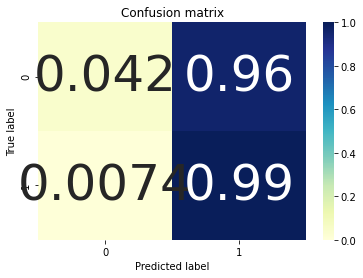

In [137]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [138]:

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.04229195 0.99261783]
The Precision is: [0.41704036 0.89247422]
The False positive rate is: [0.00738217 0.95770805]
The False Negative Rate is:  [0.95770805 0.00738217]

The average TPR is: 0.5174548908323668
The average Precision is: 0.6547572875106635
The average False positive rate is: 0.4825451091676331
The average False Negative Rate is: 0.4825451091676331


In [139]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.2977087525625557
The Log Loss on Testing Dataset is:  0.30199846775239886


# Hyper Parameter Tuning

In [140]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.8849718335453389:
The Logg Loss of C parameter 1e-05 is 0.35455931709235977:

The CA of C parameter 3.359818286283781e-05 is 0.8849718335453389:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.3501631801689908:

The CA of C parameter 0.00011288378916846884 is 0.8849718335453389:
The Logg Loss of C parameter 0.00011288378916846884 is 0.3414471564136823:

The CA of C parameter 0.000379269019073225 is 0.8849718335453389:
The Logg Loss of C parameter 0.000379269019073225 is 0.32971608169448957:

The CA of C parameter 0.0012742749857031334 is 0.8849718335453389:
The Logg Loss of C parameter 0.0012742749857031334 is 0.3189071063206684:

The CA of C parameter 0.004281332398719391 is 0.8849718335453389:
The Logg Loss of C parameter 0.004281332398719391 is 0.3100773377560641:

The CA of C parameter 0.01438449888287663 is 0.8847901144830093:
The Logg Loss of C parameter 0.01438449888287663 is 0.30429709292593576:

The CA of C parameter 0.04832930238571752

In [141]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)

The CA is: 0.8849718335453389
The Logistic Loss is:  0.3545583379503553
The optimal C parameter is:  [1.e-05]


The CA of C parameter 1e-05 is 0.8849718335453389:
The Logg Loss of C parameter 1e-05 is 0.35455931709235977:



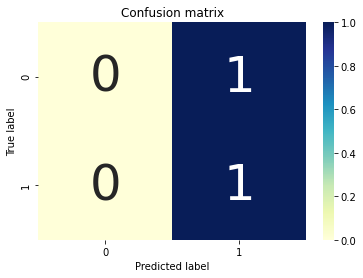

The CA of C parameter 3.359818286283781e-05 is 0.8849718335453389:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.3501631801689908:



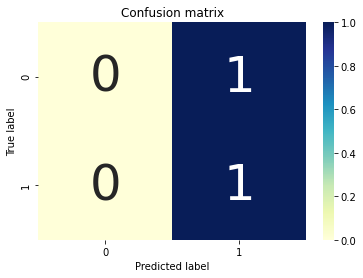

The CA of C parameter 0.00011288378916846884 is 0.8849718335453389:
The Logg Loss of C parameter 0.00011288378916846884 is 0.3414471564136823:



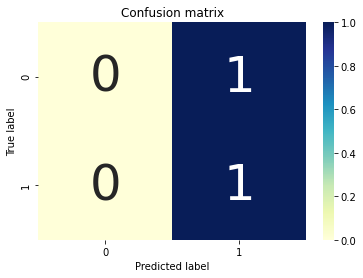

The CA of C parameter 0.000379269019073225 is 0.8849718335453389:
The Logg Loss of C parameter 0.000379269019073225 is 0.32971608169448957:



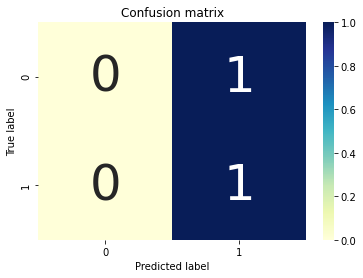

The CA of C parameter 0.0012742749857031334 is 0.8849718335453389:
The Logg Loss of C parameter 0.0012742749857031334 is 0.3189071063206684:



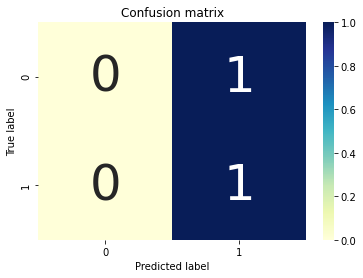

The CA of C parameter 0.004281332398719391 is 0.8849718335453389:
The Logg Loss of C parameter 0.004281332398719391 is 0.3100773377560641:



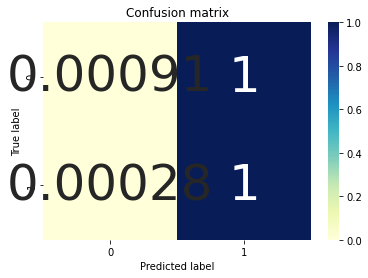

The CA of C parameter 0.01438449888287663 is 0.8847901144830093:
The Logg Loss of C parameter 0.01438449888287663 is 0.30429709292593576:



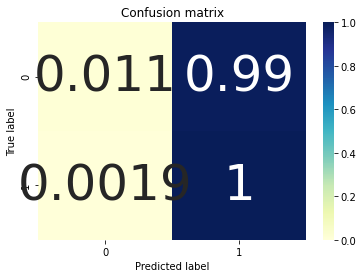

The CA of C parameter 0.04832930238571752 is 0.883881519171361:
The Logg Loss of C parameter 0.04832930238571752 is 0.3023187668725369:



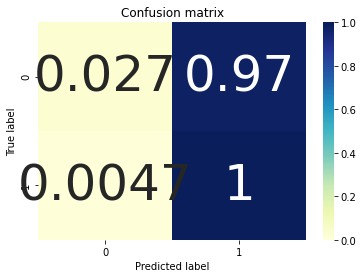

The CA of C parameter 0.1623776739188721 is 0.8840632382336907:
The Logg Loss of C parameter 0.1623776739188721 is 0.30200943774322503:



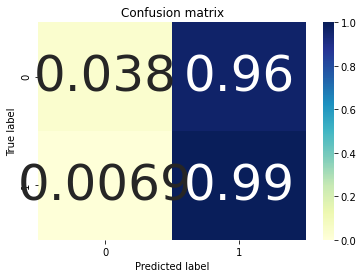

The CA of C parameter 0.5455594781168515 is 0.883881519171361:
The Logg Loss of C parameter 0.5455594781168515 is 0.301995923456975:



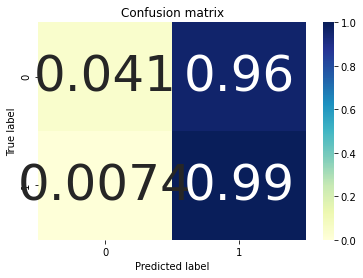

The CA of C parameter 1.8329807108324339 is 0.883881519171361:
The Logg Loss of C parameter 1.8329807108324339 is 0.30200124385482074:



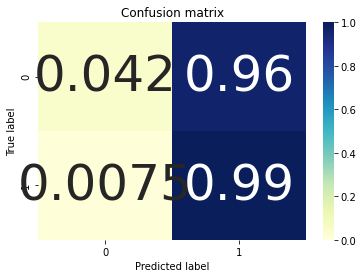

The CA of C parameter 6.1584821106602545 is 0.883881519171361:
The Logg Loss of C parameter 6.1584821106602545 is 0.3020041414419747:



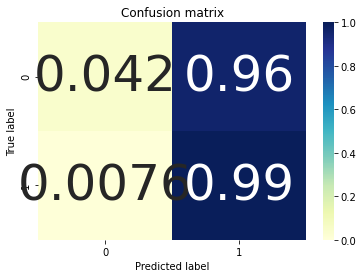

The CA of C parameter 20.6913808111479 is 0.8836998001090315:
The Logg Loss of C parameter 20.6913808111479 is 0.30200510350397974:



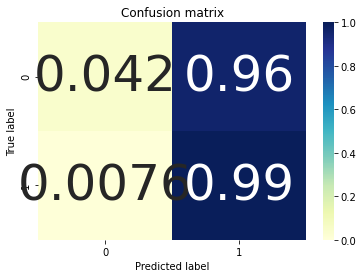

The CA of C parameter 69.51927961775606 is 0.8836998001090315:
The Logg Loss of C parameter 69.51927961775606 is 0.30200539873572907:



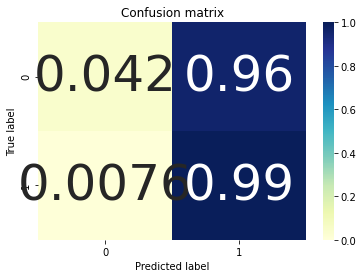

The CA of C parameter 233.57214690901213 is 0.8836998001090315:
The Logg Loss of C parameter 233.57214690901213 is 0.3020054873962335:



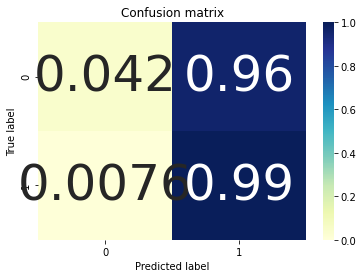

The CA of C parameter 784.7599703514607 is 0.8836998001090315:
The Logg Loss of C parameter 784.7599703514607 is 0.302005513854673:



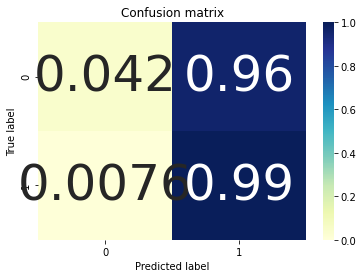

The CA of C parameter 2636.6508987303555 is 0.8836998001090315:
The Logg Loss of C parameter 2636.6508987303555 is 0.3020055217358331:



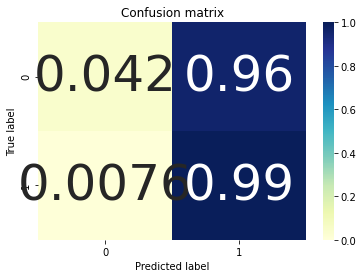

The CA of C parameter 8858.667904100832 is 0.8836998001090315:
The Logg Loss of C parameter 8858.667904100832 is 0.30200552408209247:



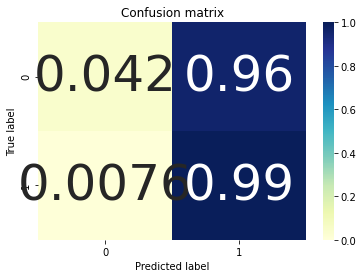

The CA of C parameter 29763.51441631313 is 0.8836998001090315:
The Logg Loss of C parameter 29763.51441631313 is 0.3020055247804703:



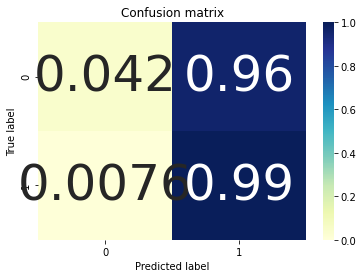

The CA of C parameter 100000.0 is 0.8836998001090315:
The Logg Loss of C parameter 100000.0 is 0.3020055249883365:



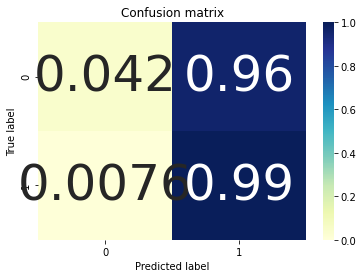

In [142]:
for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred = log_reg2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
    plt.show()